## Kaggle European Soccer Database Analysis
### 1. Exploratory Data Analysis - Country, League, Team and Player Tables

The data are downloaded here: [Kaggle European Soccer Database](https://www.kaggle.com/hugomathien/soccer).
### Highlights

* **Relative age effect (RAE) among football players is confirmed.**
* **Football players have an average height of 181.9 cm and average weight of 168.4 lb (76.4 kg).**
      
### Table of Contents
#### 1.1 [Country](#Country)
#### 1.2 [League](#League)
#### 1.3 [Team](#Team)
#### 1.4 [Player](#Player)

First of all, let's import required python modules for data analysis as below.

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
from scipy.stats import norm
import pickle
from tqdm import tqdm
import os

sns.set_style('whitegrid')
sns.set_context('notebook')

print('All general modules are imported.')

All general modules are imported.


Establish the connection to database. Change the database file directory as you wish.

In [2]:
# Establish connection to sql database

# database file name
db_filename = 'database.sqlite'

# change database file directory as you wish
db_filedir = os.path.join(os.path.pardir, os.path.pardir, os.path.pardir, 'data_source', 'kaggle', db_filename)

try:
    con=sqlite3.connect(db_filedir)
    print('Connection to the database is established.\n')
except Exception as e:
    print('Unable to establish the connection.')

cursor=con.execute("select name from sqlite_master where type='table'")
print('Following Tables are found in the database:')
for i in cursor.fetchall():
    print('{}'.format(i[0]))

Connection to the database is established.

Following Tables are found in the database:
sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


Analysis of Player_Attributes and Team_Attributes is not taken in this work. This is because the rates of players and teams are from the game EA sports, which are not very objective.

In this section, all tables will be explored except match table. Match table will be deferred to next notebook.

In [3]:
# read player table
try:
    player = pd.read_sql_query('select * from Player',con)
    print('Successfully load player table from the database.')
except Exception as e:
    print('Unable to load player table from the database.')
    
# read league table
try:
    league=pd.read_sql_query('select * from League',con)
    print('Successfully load league table from the database.')
except Exception as e:
    print('Unable to load league table from the database.')

# read country table
try:
    country=pd.read_sql_query('select * from Country',con)
    print('Successfully load country table from the database.')
except Exception as e:
    print('Unable to load country table from the database.')

# read team table
try:
    team=pd.read_sql_query('select * from Team', con)
    print('Successfully load team table from the database.')
except Exception as e:
    print('Unable to load team table from the database.')

Successfully load player table from the database.
Successfully load league table from the database.
Successfully load country table from the database.
Successfully load team table from the database.


### <a id='Country'></a>1.1 Country

Next, let's explore country table.

In [4]:
print(country.info())
print(country)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland


There are 11 European countries.

### <a id='League'></a>1.2 League

Next league table.

In [5]:
print(league.info())
print(league)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League


They are all first tier leagues in the 11 countries shown in the country table.

### <a id='Team'></a>1.3 Team

Then team table.

In [6]:
print(team.info())
team.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


There are 299 teams in the team table. Among them, 11 teams don't have fifa_api_id.

In [7]:
print(team.isnull().sum())

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


The 11 teams are:

In [8]:
team[team['team_fifa_api_id'].isnull()]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
8,9,7947,NaN,FCV Dender EH,DEN
14,15,4049,NaN,Tubize,TUB
170,26561,6601,NaN,FC Volendam,VOL
204,34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
208,35286,7992,NaN,Trofense,TRO
213,35291,10213,NaN,Amadora,AMA
223,36248,9765,NaN,Portimonense,POR
225,36723,4064,NaN,Feirense,FEI
232,38789,6367,NaN,Uniao da Madeira,MAD
233,38791,188163,NaN,Tondela,TON


#### 1.3.1 team_api_id

In [9]:
print('The number of unique team_api_id is {}.'.format(team.team_api_id.unique().shape[0]))

The number of unique team_api_id is 299.


So each team has its own team_api_id.

#### 1.3.2 team_fifa_api_id

In [10]:
print('The number of unique team_fifa_api_id is {}.'.format(team[team.team_fifa_api_id.notnull()].team_fifa_api_id.unique().shape[0]))

The number of unique team_fifa_api_id is 285.


288 teams have 285 team_fifa_api_id. Some teams share same team_fifa_api_id.

In [11]:
counts_fifa_id = team.groupby('team_fifa_api_id',as_index=False).count()
shared_fifa_id = counts_fifa_id[counts_fifa_id['id']!=1]['team_fifa_api_id'].values
print('The shared team_fifa_ids are: {}'.format(shared_fifa_id))
team[team['team_fifa_api_id'].isin(shared_fifa_id)]

The shared team_fifa_ids are: [    301.  111429.  111560.]


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


3 paris of teams share same team_fifa_api_id, with 2 teams in each pair. However, from their team_long_name attribute, the teams in each pair should mean the same team, even somehow they have different team_short_name as well as team_api_id.

#### 1.3.3 team_long_name and team_short_name

In [12]:
print('The number of unique team_long_name is {}.'.format(team.team_long_name.unique().shape[0]))
print('The number of unique team_short_name is {}.'.format(team.team_short_name.unique().shape[0]))

The number of unique team_long_name is 296.
The number of unique team_short_name is 259.


Quite a few teams share same team_short_name.

So the summary of team table:
    1. 296 teams;
    2. 282 teams have their own unique team_fifa_api_id and team_api_id;
    3. 11 teams have unique team_api_id, but no team_fifa_api_id;
    4. 3 teams have unique team_fifa_api_id, but each team has 2 team_api_ids.
    5. Each team has its own unique team_long_name;
    6. A few teams share same team_short_name.

### <a id='Player'></a>1.4 Player
Finally player table.

In [13]:
print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


#### 1.4.1 Player IDs

In [14]:
print('The number of unique player_api_id is {}.'.format(player.player_api_id.unique().shape[0]))
print('The number of unique player_fifa_api_id is {}.'.format(player.player_fifa_api_id.unique().shape[0]))

The number of unique player_api_id is 11060.
The number of unique player_fifa_api_id is 11060.


There are 11060 players in the player table. Each player has his own player_api_id and player_fifa_api_id.

#### 1.4.2 Player Name

In [15]:
print('The number of unique player_name is {}.'.format(player.player_name.unique().shape[0]))

The number of unique player_name is 10848.


Some players have same names.

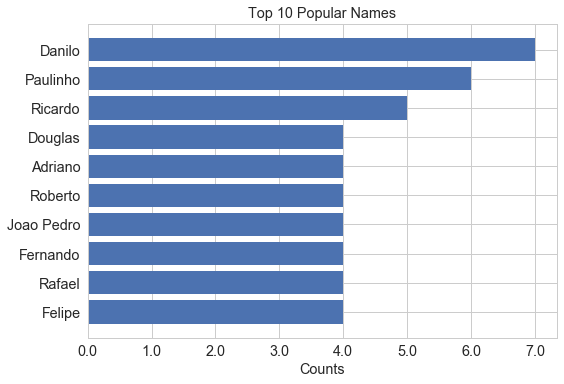

In [22]:
# Top counts number
top_num = 10

# get top counts name table
top_counts_name = player.groupby('player_name',as_index=False).count().sort_values('player_api_id',ascending=False).head(top_num)

# Make a barhplot
fig, ax = plt.subplots()

ax.barh(np.arange(top_num), top_counts_name['player_api_id'].values, align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(np.arange(top_num))
ax.set_yticklabels(top_counts_name['player_name'].values, fontsize='large')
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks(), fontsize='large')
ax.set_xlabel('Counts', fontsize='large')
ax.set_title('Top {} Popular Names'.format(top_num), fontsize='large')

plt.tight_layout()

#### 1.4.3 player birthday
10 players were born on 1989/3/2.

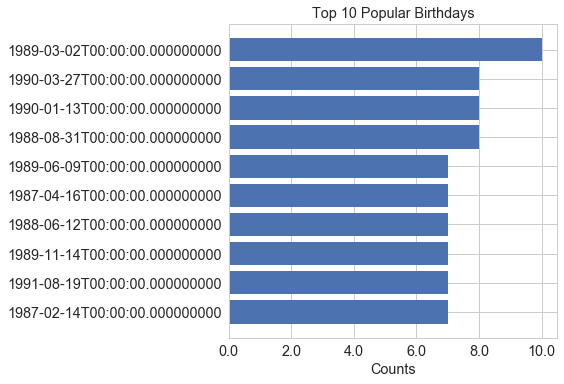

In [23]:
# Top counts number
top_num = 10

# get top counts name table
top_counts_birthday = player.groupby('birthday',as_index=False).count().sort_values('player_api_id',ascending=False).head(top_num)

# Make a barhplot
fig, ax = plt.subplots()

ax.barh(np.arange(top_num), top_counts_birthday['player_api_id'].values, align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(np.arange(top_num))
ax.set_yticklabels(top_counts_birthday['birthday'].values, fontsize='large')
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks(), fontsize='large')
ax.set_xlabel('Counts', fontsize='large')
ax.set_title('Top {} Popular Birthdays'.format(top_num), fontsize='large')

plt.tight_layout()

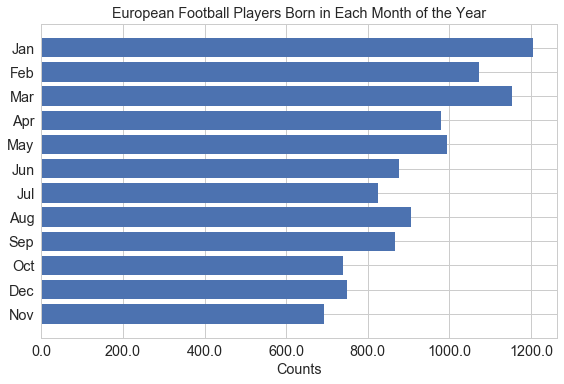

In [24]:
player['birthday'] = pd.to_datetime(player['birthday'], yearfirst=True)
player['month'] = [i.month for i in player['birthday']]

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_gby = player.groupby(by='month', as_index=False).count()

# Make a barhplot
fig, ax = plt.subplots()

ax.barh(month_gby['month'], month_gby['birthday'], align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(month_gby['month'])
ax.set_yticklabels(month_name, fontsize='large')
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks(), fontsize='large')
ax.set_xlabel('Counts', fontsize='large')
ax.set_title('European Football Players Born in Each Month of the Year'.format(top_num), fontsize='large')

plt.tight_layout()

This result confirms relative age effect (RAE), or month of birth bias(https://en.wikipedia.org/wiki/Relative_age_effect). The bias is based on specific cut-off dates to establish eligibility for inclusion, and it is used to describe participation is higher amongst those born early in the relevant selection period.

The most commonly used cut-off date for youth international sporting competition is 1 January, which is the case for FIFA and the 6 international football confederations (AFC, CAF, CONCACAF, CONMEBOL, OFC and UEFA). This results players born in Januray to have an advantage to be professional football players.

By contrast, in English football, children are placed into year groups based on whether they are born before or on 1 September. So this results a different performance of bias, according to [The Science of Soccer](https://www.amazon.com/Science-Soccer-John-Wesson/dp/0750308133).

#### 1.4.4 player height
Player height follows Normal Distribution.

Average player height is 181.9 cm.
The shortest player is Juan Quero. His height is 157.5 cm.
The tallest player is Kristof van Hout. His height is 208.3 cm.


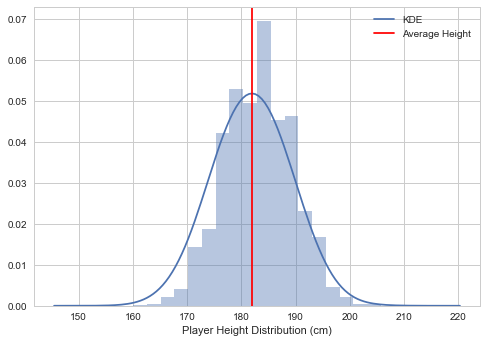

In [25]:
sns.distplot(player['height'],bins=20,kde=True,
            kde_kws={"bw": 4, "label": "KDE"})
plt.axvline(player['height'].mean(), 0, 1, color='r', label='Average Height')
plt.xlabel('Player Height Distribution (cm)')
plt.legend()

print('Average player height is {:.1f} cm.'.format(player['height'].mean()))
print('The shortest player is {}. His height is {:.1f} cm.'.format(player[player.height==np.min(player.height)].player_name.values[0],
                                                               np.min(player.height)))
print('The tallest player is {}. His height is {:.1f} cm.'.format(player[player.height==np.max(player.height)].player_name.values[0],
                                                              np.max(player.height)))

#### 1.4.5 player weight

Player weight also follows Normal Distribution.

Average player weight is 168.4 lb (76.4 kg).
The lightest player is Juan Quero. His weight is 117.0 lb (53.1 kg).
The heaviest player is Kristof van Hout. His weight is 243.0 lb (110.2 kg).


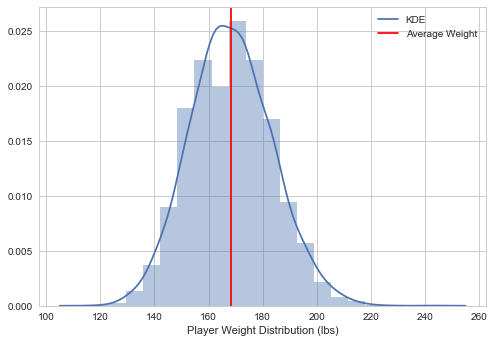

In [26]:
sns.distplot(player['weight'],bins=20,
            kde_kws={"bw": 4, "label": "KDE"})
plt.axvline(player['weight'].mean(), 0, 1, color='r', label='Average Weight')
plt.xlabel('Player Weight Distribution (lbs)')
plt.legend()

print('Average player weight is {:.1f} lb ({:.1f} kg).'.format(player['weight'].mean(), player['weight'].mean()*0.4536))
print('The lightest player is {}. His weight is {:.1f} lb ({:.1f} kg).'.format(player[player.weight==np.min(player.weight)].player_name.values[0],
                                                                   np.min(player.weight), np.min(player.weight)*0.4536))
print('The heaviest player is {}. His weight is {:.1f} lb ({:.1f} kg).'.format(player[player.weight==np.max(player.weight)].player_name.values[0],
                                                              np.max(player.weight), np.max(player.weight)*0.4536))